# __Modelos en TensorBoard__

### Cargar Datos

In [8]:
# librerias
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf

from tensorflow.keras import regularizers

# libreria para trabajar con las bases de datos 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


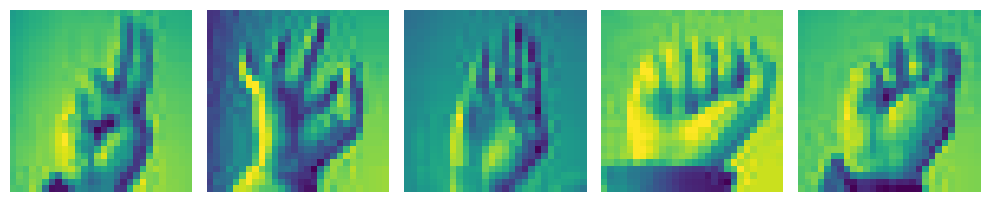

In [9]:
# ruta de los archivos
train_dir = './sign-language-img/Train'
test_dir = './sign-language-img/Test'

# data generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

# generator para test, training y validation
# para datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

# para datos de validacion
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

# para datos de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# clases
classes = [char for char in string.ascii_uppercase if char != 'J' if char != 'Z']

# funcion para mostrar las imagenes
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()

    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# mostrar 5 imagenes
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

### Modelo a trabajar

In [10]:
# funcion para generalizar la creacion del modelo
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer = regularizers.l2(1e-5), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

### Aplicamos TensorBoard

Importaremos el callback de TensorBoard y el módulo nativo de time de Python.

In [11]:
from tensorflow.keras.callbacks import TensorBoard
from time import time

Generaremos un modelo con nuestra función generadora genérica y lo compilaremos con la configuración usual

In [12]:
model_tensorboard = get_model()
model_tensorboard.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Antes de entrenar el modelo crearemos el callback de TensorBoard al que le especificaremos la ruta donde deberá guardar los registros.

In [13]:
callback_tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

Entrenaremos el modelo agregando el TensorBoard como callback.

In [14]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs=20,
    callbacks=[callback_tensorboard],
    validation_data=validation_generator
)

Epoch 1/20
215/215 [==============================] - 75s 339ms/step - loss: 1.7052 - accuracy: 0.4860 - val_loss: 0.8029 - val_accuracy: 0.7319
Epoch 2/20
215/215 [==============================] - 46s 214ms/step - loss: 0.3820 - accuracy: 0.8861 - val_loss: 0.5670 - val_accuracy: 0.8182
Epoch 3/20
215/215 [==============================] - 45s 207ms/step - loss: 0.1469 - accuracy: 0.9663 - val_loss: 0.5952 - val_accuracy: 0.8344
Epoch 4/20
215/215 [==============================] - 45s 208ms/step - loss: 0.0890 - accuracy: 0.9828 - val_loss: 0.5901 - val_accuracy: 0.8484
Epoch 5/20
215/215 [==============================] - 57s 264ms/step - loss: 0.0642 - accuracy: 0.9897 - val_loss: 0.6134 - val_accuracy: 0.8575
Epoch 6/20
215/215 [==============================] - 47s 220ms/step - loss: 0.0522 - accuracy: 0.9928 - val_loss: 0.5649 - val_accuracy: 0.8498
Epoch 7/20
215/215 [==============================] - 44s 206ms/step - loss: 0.0466 - accuracy: 0.9946 - val_loss: 0.6127 - val_ac

### Analisis y publicacion de resultados

Usaremos los comandos mágicos de IPython para cargar TensorBoard. Una vez cargado, le indicaremos el directorio del que debe extraer los resultados para analizarlos.

In [16]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3538), started 0:01:52 ago. (Use '!kill 3538' to kill it.)